# Fourier neural operator with FEDformer

### Repo cloning
```bash
git clone https://github.com/MAZiqing/FEDformer.git
cd FEDformer
```

### Create virtual env (with python 3.9)
```bash
python -m venv fedformer_env
source fedformer_env/bin/activate
```

### Install requirements
```bash
pip install -r requirements.txt
pip install matplotlib==3.6.2, numpy==1.22.4
```

(Due to GPU features I've used finally torch==2.8.0 with cu12)

### Download data
From [Google Drive](https://drive.google.com/drive/folders/1ZOYpTUa82_jCcxIdTmyr0LXQfvaM9vIy)

### Custom your settiong for run.py
For example `scripts/run_exchange.sh`:
```bash
export CUDA_VISIBLE_DEVICES=0

python -u run.py \
 --is_training 1 \
 --root_path ./dataset/exchange_rate/ \
 --data_path exchange_rate.csv \
 --task_id Exchange \
 --model FEDformer \
 --data custom \
 --features S \
 --seq_len 96 \
 --label_len 48 \
 --pred_len 96 \
 --train_epochs 2 \
 --e_layers 2 \
 --d_layers 1 \
 --factor 3 \
 --enc_in 1 \
 --dec_in 1 \
 --c_out 1 \
 --des 'Exp' \
 --itr 3
 ```

### Run experiment

In [4]:
!bash ./scripts/run_exchange.sh

Args in experiment:
Namespace(is_training=1, task_id='Exchange', model='FEDformer', version='Fourier', mode_select='random', modes=64, L=3, base='legendre', cross_activation='tanh', data='custom', root_path='./dataset/exchange_rate/', data_path='exchange_rate.csv', features='S', target='OT', freq='h', detail_freq='h', checkpoints='./checkpoints/', seq_len=96, label_len=48, pred_len=96, enc_in=1, dec_in=1, c_out=1, d_model=512, n_heads=8, e_layers=2, d_layers=1, d_ff=2048, moving_avg=[24], factor=3, distil=True, dropout=0.05, embed='timeF', activation='gelu', output_attention=False, do_predict=False, num_workers=10, itr=3, train_epochs=2, batch_size=32, patience=3, learning_rate=0.0001, des='Exp', loss='mse', lradj='type1', use_amp=False, use_gpu=True, gpu=0, use_multi_gpu=False, devices='0,1')
Use GPU: cuda:0
fourier enhanced block used!
modes=64, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,

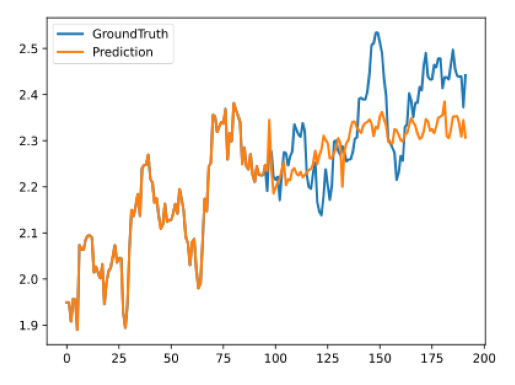

In [4]:
import fitz
import matplotlib.pyplot as plt
import io

doc = fitz.open('test_results/Exchange_FEDformer_random_modes64_custom_ftS_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_1/0.pdf')

for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    pix = page.get_pixmap()

    img_data = pix.tobytes("png")

    plt.imshow(plt.imread(io.BytesIO(img_data)))
    plt.axis('off')
    plt.show()

doc.close()